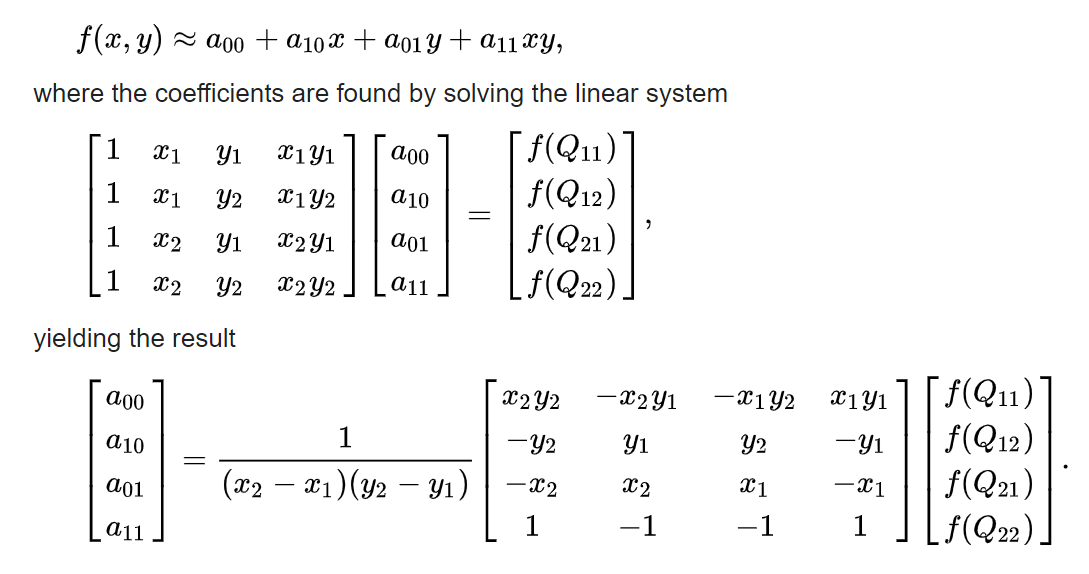

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
Q = np.array([1.,2.,0.5,0.3])
x = np.array([1,-1,-1,1])
y = np.array([1,1,-1,-1])
ones = np.array([1,1,1,1])
M = np.array([ones,x,y,x*y])
M_inv = np.linalg.inv(M)
a_nm = np.dot(Q,M_inv)
a_nm
print(M)
def Temperature(x,y,a_nm):
  return a_nm[0] + a_nm[1]*x + a_nm[2]*y + a_nm[3]*x*y
#Estimado de temperatura en el punto P=(0,0.5)
print(Temperature(0,0.5,a_nm)) 


[[ 1  1  1  1]
 [ 1 -1 -1  1]
 [ 1  1 -1 -1]
 [ 1 -1  1 -1]]
1.225


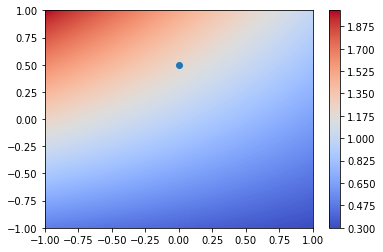

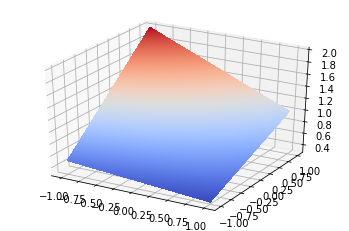

In [18]:
from re import X
#Grafica de la funcion de temperatura 
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
colourMap = plt.cm.coolwarm
X_k,Y_k = np.meshgrid(x,y)
Z = Temperature(X_k,Y_k,a_nm)
fig,ax = plt.subplots()
contourf_ = ax.contourf(X_k,Y_k,Z, 400,cmap=colourMap)
cbar = fig.colorbar(contourf_)
plt.scatter(0,0.5)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_k, Y_k, Z, rstride=1, cstride=1, cmap=colourMap,linewidth=0, antialiased=False)


In [26]:
#Rotacion de el lente 
thetas =  np.linspace(0,2*np.pi,200)

x = np.array([1,-1,-1,1])
y = np.array([1,1,-1,-1])
min = 3
P_m = np.zeros((4,2))
P_m_theta =  np.zeros((4,2))
for  theta in thetas: 
  transf_m = np.array([[np.cos(theta), -1* np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  for i in range(0,4):
    P_m[i] = [x[i],y[i]]
    P_m_theta[i] = np.dot(transf_m,P_m[i])
  x_theta = P_m_theta.T[0]
  y_theta = P_m_theta.T[1]
  M_t = np.array([ones,x_theta,y_theta,x_theta*y_theta])
  M_inv = np.linalg.inv(M_t)
  a_nm_2 = np.dot(Q,M_inv)
  if Temperature(0,0.5,a_nm_2)<min:
    min = Temperature(0,0.5,a_nm_2)
    angle = theta
    final_ajust = a_nm_2
degrees = ((np.pi/2) * angle) / np.pi
print("El angulo en el cual la temperatura es minima es: {} rad {} grados con una temperatura de {}K".format(angle.round(3),degrees.round(3),min.round(3)))


El angulo en el cual la temperatura es minima es: 2.652 rad 1.326 grados con una temperatura de 0.637K


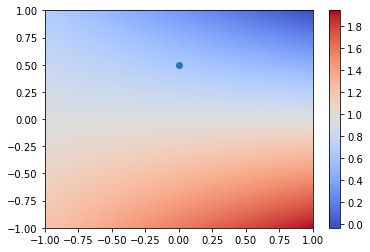

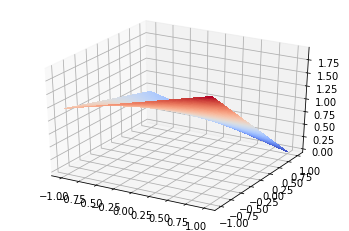

In [20]:
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
colourMap = plt.cm.coolwarm
X_k,Y_k = np.meshgrid(x,y)
Z_2= Temperature(X_k,Y_k,final_ajust)
fig,ax = plt.subplots()
contourf_2 = ax.contourf(X_k,Y_k,Z_2, 400,cmap=colourMap)
cbar = fig.colorbar(contourf_2)
plt.scatter(0,0.5)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_k, Y_k, Z_2, rstride=1, cstride=1, cmap=colourMap,linewidth=0, antialiased=False)